In [1]:
import pandas as pd
import calendar
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('data/zippedData/tn.movie_budgets.csv.gz')
df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [3]:
df["production_budget"] = df["production_budget"].str.replace(",","").str.replace("$","").astype(int)
df["domestic_gross"] = df["domestic_gross"].str.replace(",","").str.replace("$","").astype(int)
df["worldwide_gross"] = df["worldwide_gross"].str.replace(",","").str.replace("$","").astype(int)


In [4]:
df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,0
5778,79,"Apr 2, 1999",Following,6000,48482,240495
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0


In [5]:
df['profit'] = df['worldwide_gross'] - df['production_budget']
df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747
...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,0,-7000
5778,79,"Apr 2, 1999",Following,6000,48482,240495,234495
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338,-3662
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0,-1400


In [6]:
df = df.loc[df['profit'] > 0 ]

In [7]:
df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220
...,...,...,...,...,...,...,...
5773,74,"Feb 26, 1993",El Mariachi,7000,2040920,2041928,2034928
5774,75,"Oct 8, 2004",Primer,7000,424760,841926,834926
5775,76,"May 26, 2006",Cavite,7000,70071,71644,64644
5778,79,"Apr 2, 1999",Following,6000,48482,240495,234495


In [8]:
df['return_rate'] = df['profit']/df['production_budget']
df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,return_rate
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,5.532577
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,1.546673
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,3.243841
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,3.153696
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220,5.710167
...,...,...,...,...,...,...,...,...
5773,74,"Feb 26, 1993",El Mariachi,7000,2040920,2041928,2034928,290.704000
5774,75,"Oct 8, 2004",Primer,7000,424760,841926,834926,119.275143
5775,76,"May 26, 2006",Cavite,7000,70071,71644,64644,9.234857
5778,79,"Apr 2, 1999",Following,6000,48482,240495,234495,39.082500


## What Genre Is the most profitible?

In [23]:
df_profit = df.sort_values(by=['profit'], ascending = False )
top_20_profit = df_profit.head(20)
top_20_profit

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,return_rate
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,5.532577
42,43,"Dec 19, 1997",Titanic,200000000,659363944,2208208395,2008208395,10.041042
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,5.827114
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220,5.710167
33,34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,1433854864,6.669092
66,67,"Apr 3, 2015",Furious 7,190000000,353007020,1518722794,1328722794,6.993278
26,27,"May 4, 2012",The Avengers,225000000,623279547,1517935897,1292935897,5.746382
260,61,"Jul 15, 2011",Harry Potter and the Deathly Hallows: Part II,125000000,381193157,1341693157,1216693157,9.733545
41,42,"Feb 16, 2018",Black Panther,200000000,700059566,1348258224,1148258224,5.741291
112,13,"Jun 22, 2018",Jurassic World: Fallen Kingdom,170000000,417719760,1305772799,1135772799,6.681016


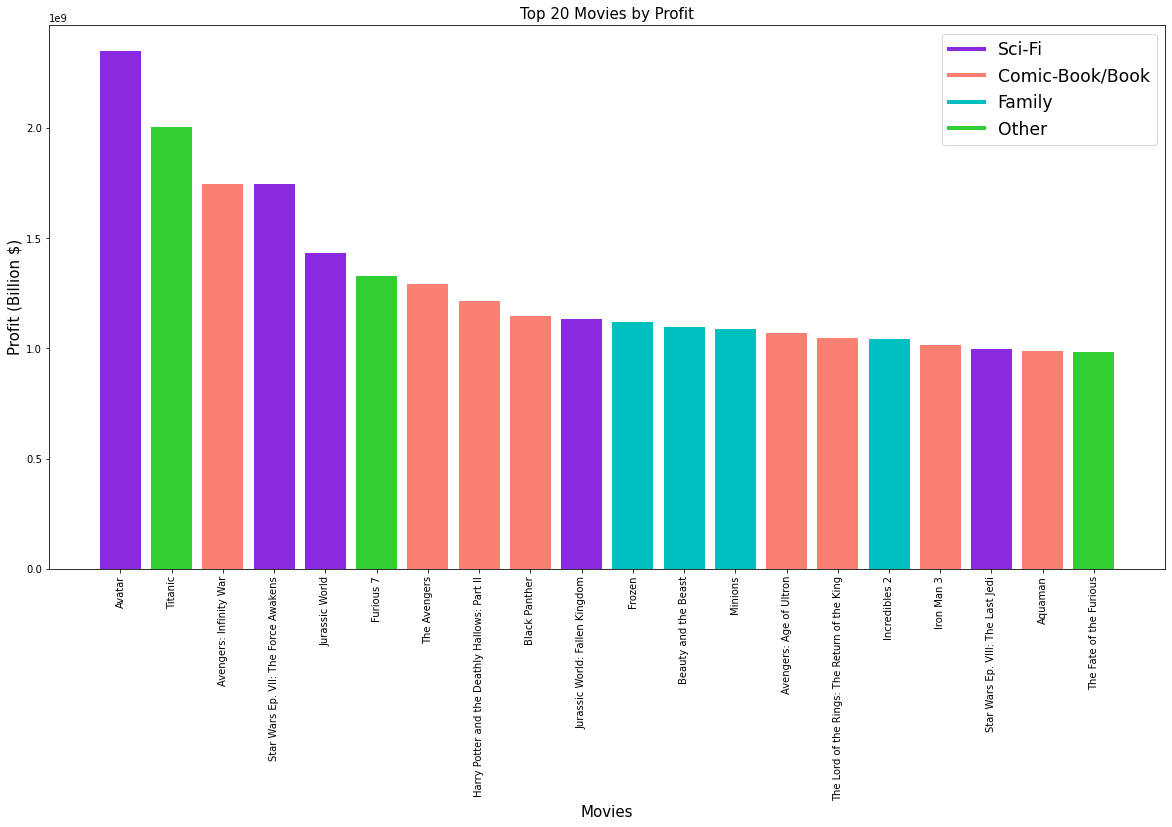

In [24]:
# Plot a bar graph of the most common names 
fig, ax = plt.subplots(figsize = (20,10))


ax.bar(top_20_profit['movie'], top_20_profit['profit'] , color = ['blueviolet','limegreen','salmon','blueviolet','blueviolet','limegreen','salmon','salmon','salmon','blueviolet','c','c','c','salmon','salmon','c','salmon','blueviolet','salmon','limegreen'])

# Add labels for x and y axes
ax.set_xlabel('Movies', fontsize = 15)
ax.set_ylabel('Profit (Billion $)', fontsize = 15)

#setting color
custom_lines = [Line2D([0], [0], color="blueviolet", lw=4),
                Line2D([0], [0], color="salmon", lw=4),
                Line2D([0], [0], color="c", lw=4),
                Line2D([0], [0], color="limegreen", lw=4)]

# Add a title for the plot
ax.set_title('Top 20 Movies by Profit', fontsize=15)

ax.tick_params(axis='x', labelrotation = 90)

# add a legend 
plt.legend(custom_lines, ['Sci-Fi', 'Comic-Book/Book', 'Family', 'Other'], fontsize="xx-large") ###


## What Movies have the best rate of return?

In [29]:
df_return_rate = df.sort_values(by=['return_rate'], ascending = False )
df_return_rate = df_return_rate.drop(labels=5745, axis=0)
df_return_rate = df_return_rate.drop(labels=5612, axis=0)
top_20_rate_of_return = df_return_rate.head(20)


In [30]:
top_20_rate_of_return

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,return_rate
5613,14,"Mar 21, 1980",Mad Max,200000,8750000,99750000,99550000,497.750000
5492,93,"Sep 25, 2009",Paranormal Activity,450000,107918810,194183034,193733034,430.517853
5679,80,"Jul 10, 2015",The Gallows,100000,22764410,41656474,41556474,415.564740
5406,7,"Jul 14, 1999",The Blair Witch Project,600000,140539099,248300000,247700000,412.833333
5709,10,"May 7, 2004",Super Size Me,65000,11529368,22233808,22168808,341.058585
5346,47,"Aug 13, 1942",Bambi,858000,102797000,268000000,267142000,311.354312
5773,74,"Feb 26, 1993",El Mariachi,7000,2040920,2041928,2034928,290.704000
5676,77,"Oct 1, 1968",Night of the Living Dead,114000,12087064,30087064,29973064,262.921614
5210,11,"Nov 21, 1976",Rocky,1000000,117235147,225000000,224000000,224.000000
5536,37,"Oct 17, 1978",Halloween,325000,47000000,70000000,69675000,214.384615


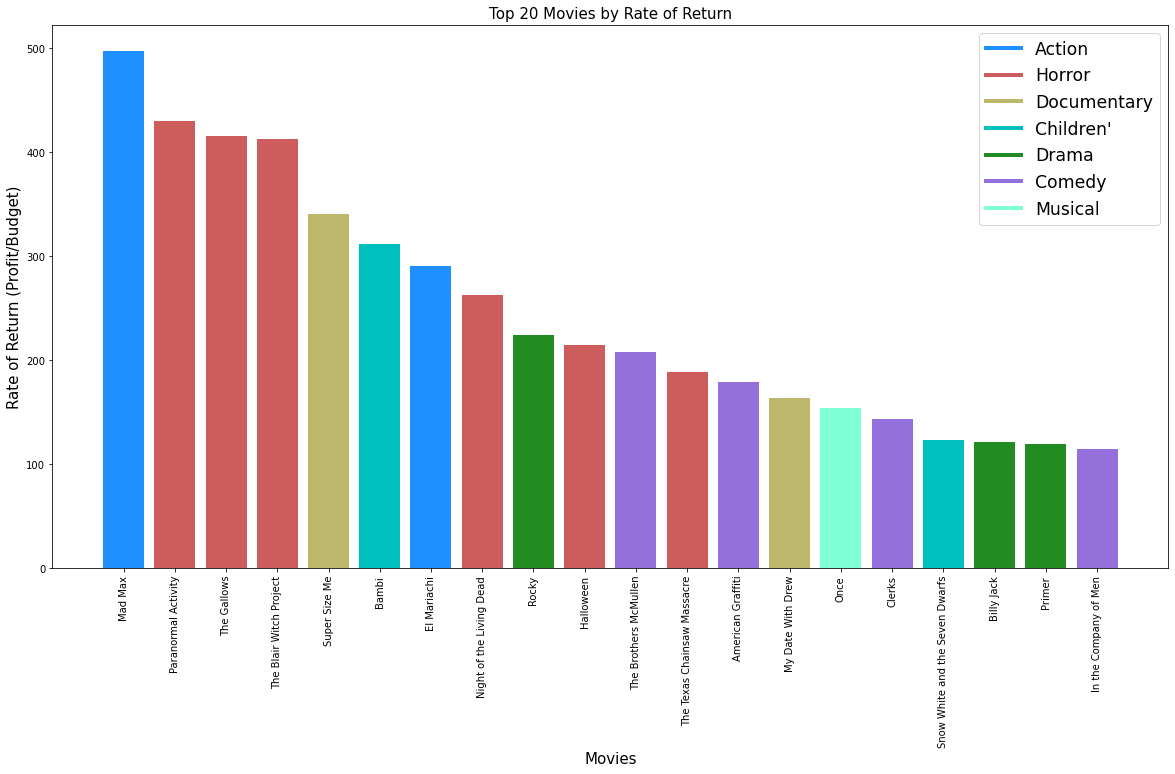

In [53]:
# Plot a bar graph of the most common names 
fig, ax = plt.subplots(figsize = (20,10))


ax.bar(top_20_rate_of_return['movie'], top_20_rate_of_return['return_rate'] , color = ['dodgerblue','indianred','indianred','indianred','darkkhaki','c','dodgerblue','indianred','forestgreen','indianred','mediumpurple','indianred','mediumpurple','darkkhaki','aquamarine','mediumpurple','c','forestgreen','forestgreen','mediumpurple'])

# Add labels for x and y axes
ax.set_xlabel('Movies', fontsize = 15)
ax.set_ylabel('Rate of Return (Profit/Budget)', fontsize = 15)

#setting color
custom_lines = [Line2D([0], [0], color="dodgerblue", lw=4),
                Line2D([0], [0], color="indianred", lw=4),
                Line2D([0], [0], color="darkkhaki", lw=4),
                Line2D([0], [0], color="c", lw=4),
                Line2D([0], [0], color="forestgreen", lw=4),
                Line2D([0], [0], color="mediumpurple", lw=4),
                Line2D([0], [0], color="aquamarine", lw=4)]

# Add a title for the plot
ax.set_title('Top 20 Movies by Rate of Return', fontsize=15)

ax.tick_params(axis='x', labelrotation = 90)

# add a legend 
plt.legend(custom_lines, ['Action', 'Horror', 'Documentary', 'Children\'','Drama','Comedy','Musical'], fontsize="xx-large") ###




## What time of year Is the best time to release a movie?

In [12]:
df_release_date = df.sort_values(by=['release_date'] )


In [13]:
df_release_date["release_date"] = df_release_date["release_date"].str.replace(",","")
df_release_date["release_date"] = df_release_date["release_date"].str.replace(" ",",")

In [14]:
df_release_date

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,return_rate
1408,9,"Apr,1,2005",Sin City,40000000,74103820,158527918,118527918,2.963198
271,72,"Apr,1,2010",Clash of the Titans,125000000,163214888,493214888,368214888,2.945719
5454,55,"Apr,1,2011",Rubber,500000,100370,680914,180914,0.361828
4227,28,"Apr,1,2011",Haevnen,5500000,1008098,15867314,10367314,1.884966
1795,96,"Apr,1,2011",Source Code,32000000,54712227,140428499,108428499,3.388391
...,...,...,...,...,...,...,...,...
4975,76,"Sep,9,2011",Grave Encounters,2000000,0,2151887,151887,0.075943
870,71,"Sep,9,2011",Contagion,60000000,75658097,137551594,77551594,1.292527
3584,85,"Sep,9,2016",When the Bough Breaks,10000000,29747603,30768449,20768449,2.076845
3287,88,"Sep,9,2016",Robinson Crusoe,13000000,8005586,42446455,29446455,2.265112


In [15]:
df_release_date['day'] = 1 
df_release_date['year'] = 2
split =  df_release_date['release_date'].str.split(',', expand=True)
df_release_date['month'], df_release_date['day'], df_release_date['year']= split[0], split[1], split[2]
df_release_date

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,return_rate,day,year,month
1408,9,"Apr,1,2005",Sin City,40000000,74103820,158527918,118527918,2.963198,1,2005,Apr
271,72,"Apr,1,2010",Clash of the Titans,125000000,163214888,493214888,368214888,2.945719,1,2010,Apr
5454,55,"Apr,1,2011",Rubber,500000,100370,680914,180914,0.361828,1,2011,Apr
4227,28,"Apr,1,2011",Haevnen,5500000,1008098,15867314,10367314,1.884966,1,2011,Apr
1795,96,"Apr,1,2011",Source Code,32000000,54712227,140428499,108428499,3.388391,1,2011,Apr
...,...,...,...,...,...,...,...,...,...,...,...
4975,76,"Sep,9,2011",Grave Encounters,2000000,0,2151887,151887,0.075943,9,2011,Sep
870,71,"Sep,9,2011",Contagion,60000000,75658097,137551594,77551594,1.292527,9,2011,Sep
3584,85,"Sep,9,2016",When the Bough Breaks,10000000,29747603,30768449,20768449,2.076845,9,2016,Sep
3287,88,"Sep,9,2016",Robinson Crusoe,13000000,8005586,42446455,29446455,2.265112,9,2016,Sep


In [16]:

dict_release_date = {i:e for e,i in enumerate(calendar.month_abbr)} #creates a dictionary

df_release_date.reindex(df_release_date.month.map(dict_release_date).sort_values().index) #map + sort_values + reindex with index

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,return_rate,day,year,month
2859,60,"Jan,13,2006",Hoodwinked,17500000,51386611,109843390,92343390,5.276765,13,2006,Jan
1642,43,"Jan,16,2009",Hotel for Dogs,35000000,73178547,122357172,87357172,2.495919,16,2009,Jan
1164,65,"Jan,16,2009",Defiance,50000000,28644813,52987754,2987754,0.059755,16,2009,Jan
2119,20,"Jan,16,2009",Paul Blart: Mall Cop,26000000,146336178,185904750,159904750,6.150183,16,2009,Jan
2736,37,"Jan,16,2009",Notorious,19000000,36843682,44972183,25972183,1.366957,16,2009,Jan
...,...,...,...,...,...,...,...,...,...,...,...
1476,77,"Dec,25,2013",Grudge Match,40000000,29807260,69807260,29807260,0.745182,25,2013,Dec
2214,15,"Dec,25,2013",August: Osage County,25000000,37738810,50738810,25738810,1.029552,25,2013,Dec
436,37,"Dec,25,2013",The Secret Life of Walter Mitty,91000000,58236838,187861183,96861183,1.064409,25,2013,Dec
1984,85,"Dec,25,2009",The Imaginarium of Doctor Parnassus,30000000,7689607,64352607,34352607,1.145087,25,2009,Dec


### Movie Release Month VS.Rate of Return

In [17]:
release_date_description = df_release_date.groupby("month")["return_rate"].describe()
release_date_description


,count,mean,std,min,25%,50%,75%,max
month,,,,,,,,
Apr,278.0,4.961054,11.625542,0.004822,0.648437,1.738520,3.588851,88.586336
Aug,317.0,7.243983,26.902863,0.000776,0.784796,1.794282,4.311689,311.354312
Dec,437.0,4.396633,9.382590,0.014633,0.900128,2.088348,4.267695,123.277880
Feb,244.0,6.104003,21.077641,0.001366,0.946732,2.291196,4.862540,290.704000
Jan,212.0,5.686557,14.334295,0.000562,0.742274,2.336390,5.244825,121.500000
Jul,316.0,7.254827,33.825983,0.057141,1.031262,2.387540,4.429259,415.564740
Jun,334.0,10.162261,98.633616,0.001911,1.123523,2.325176,4.975255,1799.000000
Mar,290.0,5.995241,30.256576,0.002909,0.768794,1.953659,4.198717,497.750000
May,268.0,6.949237,25.181140,0.009125,1.157773,2.263755,4.928941,341.058585


In [18]:
new_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

release_date_description = release_date_description.reindex(new_order, axis=0)
release_date_description

,count,mean,std,min,25%,50%,75%,max
month,,,,,,,,
Jan,212.0,5.686557,14.334295,0.000562,0.742274,2.336390,5.244825,121.500000
Feb,244.0,6.104003,21.077641,0.001366,0.946732,2.291196,4.862540,290.704000
Mar,290.0,5.995241,30.256576,0.002909,0.768794,1.953659,4.198717,497.750000
Apr,278.0,4.961054,11.625542,0.004822,0.648437,1.738520,3.588851,88.586336
May,268.0,6.949237,25.181140,0.009125,1.157773,2.263755,4.928941,341.058585
Jun,334.0,10.162261,98.633616,0.001911,1.123523,2.325176,4.975255,1799.000000
Jul,316.0,7.254827,33.825983,0.057141,1.031262,2.387540,4.429259,415.564740
Aug,317.0,7.243983,26.902863,0.000776,0.784796,1.794282,4.311689,311.354312
Sep,278.0,5.509244,27.061457,0.009264,0.707568,1.590737,3.626690,430.517853


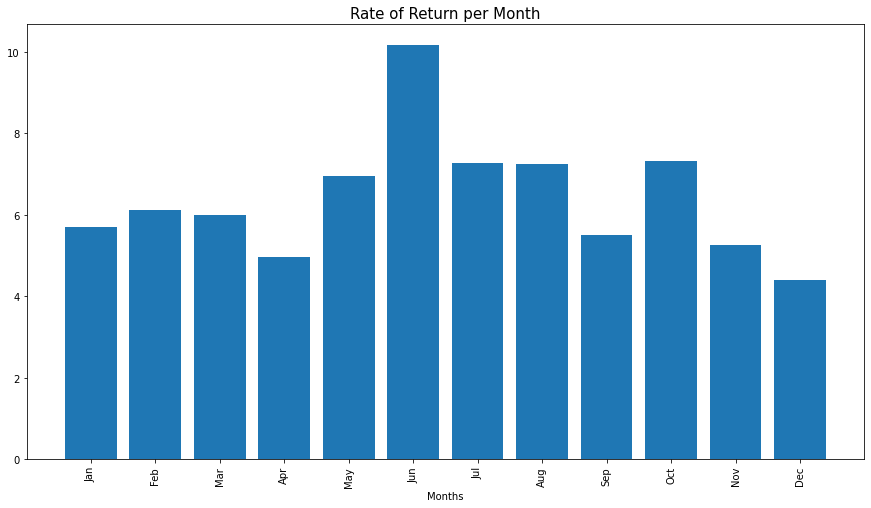

In [49]:
# Plot a bar graph of the most common names 
fig, ax = plt.subplots(figsize = (15,8))


ax.bar(release_date_description.index, release_date_description['mean'] )

# Add labels for x and y axes
ax.set_xlabel('Months')


# Add a title for the plot
ax.set_title('Rate of Return per Month', fontsize=15)

ax.tick_params(axis='x', labelrotation = 90)



### Movie Release Month VS. Profit

In [20]:
release_date_description_2 = df_release_date.groupby("month")["profit"].describe()
release_date_description_2

,count,mean,std,min,25%,50%,75%,max
month,,,,,,,,
Apr,278.0,6.507855e+07,1.646213e+08,9644.0,7632944.00,22054827.5,5.961473e+07,1.748134e+09
Aug,317.0,6.179922e+07,8.881097e+07,349.0,8462398.00,29188387.0,7.276898e+07,6.328063e+08
Dec,437.0,1.238887e+08,2.242851e+08,34174.0,15787233.00,56492772.0,1.429959e+08,2.351345e+09
Feb,244.0,7.678124e+07,1.219323e+08,10536.0,13853653.25,36908743.0,9.022844e+07,1.148258e+09
Jan,212.0,4.951140e+07,6.197238e+07,1124.0,7331397.50,28777307.0,6.915767e+07,3.775991e+08
Jul,316.0,1.401697e+08,2.010612e+08,84596.0,15975037.75,63092067.5,1.663779e+08,1.216693e+09
Jun,334.0,1.472502e+08,2.078244e+08,19109.0,17428289.50,71391967.5,1.937135e+08,1.433855e+09
Mar,290.0,8.580459e+07,1.466117e+08,22893.0,12163050.00,30795725.0,8.893102e+07,1.099200e+09
May,268.0,1.789211e+08,2.312065e+08,64644.0,14203220.00,69147716.0,2.644902e+08,1.292936e+09


In [21]:
new_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

release_date_description_2 = release_date_description.reindex(new_order, axis=0)
release_date_description_2

,count,mean,std,min,25%,50%,75%,max
month,,,,,,,,
Jan,212.0,5.686557,14.334295,0.000562,0.742274,2.336390,5.244825,121.500000
Feb,244.0,6.104003,21.077641,0.001366,0.946732,2.291196,4.862540,290.704000
Mar,290.0,5.995241,30.256576,0.002909,0.768794,1.953659,4.198717,497.750000
Apr,278.0,4.961054,11.625542,0.004822,0.648437,1.738520,3.588851,88.586336
May,268.0,6.949237,25.181140,0.009125,1.157773,2.263755,4.928941,341.058585
Jun,334.0,10.162261,98.633616,0.001911,1.123523,2.325176,4.975255,1799.000000
Jul,316.0,7.254827,33.825983,0.057141,1.031262,2.387540,4.429259,415.564740
Aug,317.0,7.243983,26.902863,0.000776,0.784796,1.794282,4.311689,311.354312
Sep,278.0,5.509244,27.061457,0.009264,0.707568,1.590737,3.626690,430.517853


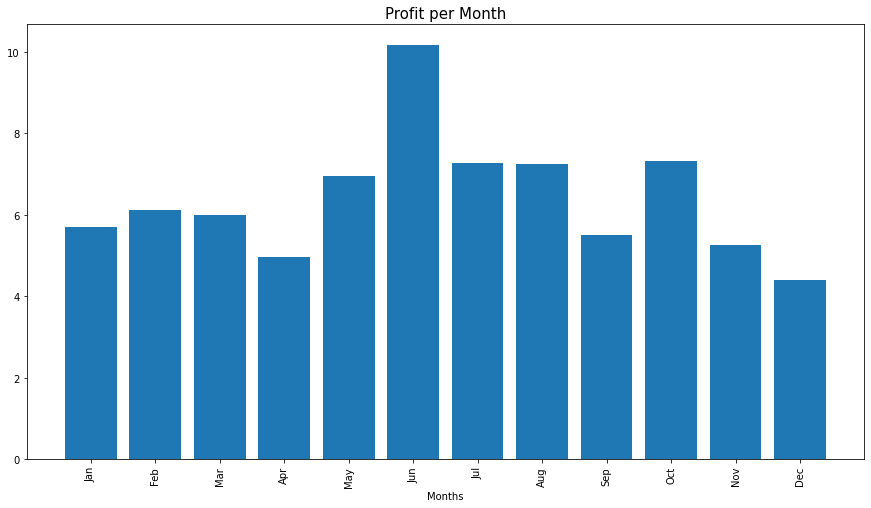

In [50]:
# Plot a bar graph of the most common names 
fig, ax = plt.subplots(figsize = (15,8))


ax.bar(release_date_description_2.index, release_date_description_2['mean'] )

# Add labels for x and y axes
ax.set_xlabel('Months')


# Add a title for the plot
ax.set_title('Profit per Month', fontsize=15)

ax.tick_params(axis='x', labelrotation = 90)

